In [1]:
import pandas as pd
import numpy as np
from pprint import pprint
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r'Final Responses.xlsx')
#print(df.head())
print(df.dtypes)

Timestamp                                                                                                                         datetime64[ns]
What do you use as your primary messaging app?                                                                                            object
From when have you used the above-chosen app as your primary messaging platform?                                                          object
What made you a) select the above-chosen since the start, or, b) switch to it later?                                                      object
At what age did you start using the messaging app?                                                                                        object
Do most of your close friends use the same messaging app as you?                                                                          object
Do most of your family members use the same messaging app as you?                                                                 

In [3]:
print("Total number of responses are :", len(df))
table = np.zeros((3,3))
#    1    2    3
# Y
# N
# M
for i in range(0, len(df)):
    city = df.at[i, 'City Tier (Coded)']
    if(df.at[i, 'If we tell you that Facebook Messenger is constantly reading your personal chats on messenger, would you still use it as much?']
      == 'Yes'):
        answer = 0
    elif(df.at[i, 'If we tell you that Facebook Messenger is constantly reading your personal chats on messenger, would you still use it as much?']
      == 'No'):
        answer = 1
    else:
        answer = 2
    table[answer][city - 1] += 1    
    
pprint(table)

Total number of responses are : 82
array([[ 4.,  2.,  0.],
       [22., 11.,  9.],
       [14., 11.,  9.]])


In [4]:
# Get chi-square value , p-value, degrees of freedom, expected frequencies using the function chi2_contingency
stat, p, dof, expected = stats.chi2_contingency(table)

# select significance value
alpha = 0.05
# Determine whether to reject or keep your null hypothesis
print('significance=%.3f, p=%.3f, stat=%.3f' % (alpha, p, stat))
if p <= alpha:
    print('Variables are associated (reject H0)')
else:
    print('Variables are not associated(fail to reject H0)')

significance=0.050, p=0.587, stat=2.827
Variables are not associated(fail to reject H0)


In [5]:
wa_start = wa_shift = fb_start = fb_shift = t_start = t_shift = 0
for i in range(len(df)):
    if(df.at[i, 'What do you use as your primary messaging app?'] == 'Whatsapp' and df.at[i, 'From when have you used the above-chosen app as your primary messaging platform?'] == 'Since the start'):
        wa_start += 1
    elif(df.at[i, 'What do you use as your primary messaging app?'] == 'Whatsapp' and df.at[i, 'From when have you used the above-chosen app as your primary messaging platform?'] == 'Switched to it some point later'):
        wa_shift += 1
    elif(df.at[i, 'What do you use as your primary messaging app?'] == 'Facebook Messenger' and df.at[i, 'From when have you used the above-chosen app as your primary messaging platform?'] == 'Switched to it some point later'):
        fb_shift += 1
    elif(df.at[i, 'What do you use as your primary messaging app?'] == 'Facebook Messenger' and df.at[i, 'From when have you used the above-chosen app as your primary messaging platform?'] == 'Since the start'):
        fb_start += 1
    elif(df.at[i, 'What do you use as your primary messaging app?'] == 'Telegram' and df.at[i, 'From when have you used the above-chosen app as your primary messaging platform?'] == 'Since the start'):
        t_start += 1
        
print(wa_start, wa_shift, fb_start, fb_shift, t_start, t_shift)

64 13 0 4 1 0


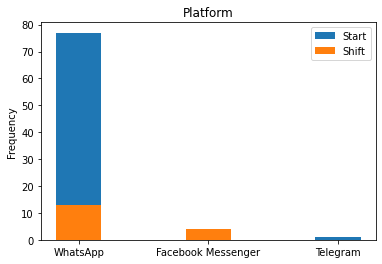

In [6]:
N = 3
Start = (wa_start+wa_shift, fb_start+fb_shift, t_start+t_shift)
Shift = (wa_shift, fb_shift, t_shift)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, Start, width)
p2 = plt.bar(ind, Shift, width)

plt.ylabel('Frequency')
plt.title('Platform')
plt.xticks(ind, ('WhatsApp', 'Facebook Messenger', 'Telegram'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Start', 'Shift'))

plt.show()

In [7]:
wa_fy = wa_fn = wa_fm = fb_fy = fb_fn = fb_fm = t_fy = t_fn = t_fm = 0
for i in range(len(df)):
    if(df.at[i, 'What do you use as your primary messaging app?'] == 'Whatsapp' and df.at[i, 'Do most of your close friends use the same messaging app as you?'] == 'Yes'):
        wa_fy += 1
    elif(df.at[i, 'What do you use as your primary messaging app?'] == 'Whatsapp' and df.at[i, 'Do most of your close friends use the same messaging app as you?'] == 'No'):
        wa_fn += 1
    elif(df.at[i, 'What do you use as your primary messaging app?'] == 'Whatsapp' and df.at[i, 'Do most of your close friends use the same messaging app as you?'] == 'Maybe'):
        wa_fm += 1
    elif(df.at[i, 'What do you use as your primary messaging app?'] == 'Facebook Messenger' and df.at[i, 'Do most of your close friends use the same messaging app as you?'] == 'Yes'):
        fb_fy += 1
    elif(df.at[i, 'What do you use as your primary messaging app?'] == 'Facebook Messenger' and df.at[i, 'Do most of your close friends use the same messaging app as you?'] == 'No'):
        fb_fn += 1
    elif(df.at[i, 'What do you use as your primary messaging app?'] == 'Facebook Messenger' and df.at[i, 'Do most of your close friends use the same messaging app as you?'] == 'Maybe'):
        fb_fm += 1
    elif(df.at[i, 'What do you use as your primary messaging app?'] == 'Telegram' and df.at[i, 'Do most of your close friends use the same messaging app as you?'] == 'Yes'):
        t_fy += 1
    elif(df.at[i, 'What do you use as your primary messaging app?'] == 'Telegram' and df.at[i, 'Do most of your close friends use the same messaging app as you?'] == 'No'):
        t_fn += 1
    elif(df.at[i, 'What do you use as your primary messaging app?'] == 'Telegram' and df.at[i, 'Do most of your close friends use the same messaging app as you?'] == 'Maybe'):
        t_fm += 1
    
        
print(wa_fy, wa_fn, wa_fm, fb_fy, fb_fn, fb_fm, t_fy, t_fn, t_fm)

72 0 5 2 0 2 1 0 0


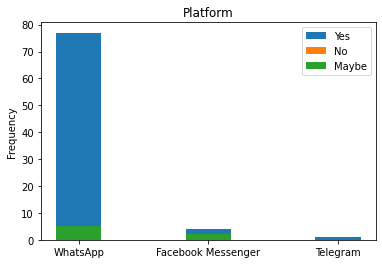

In [8]:
N = 3
Yes = (wa_fy+wa_fn+wa_fm, fb_fy+fb_fn+fb_fm, t_fy+t_fn+t_fm)
No = (wa_fn+wa_fm, fb_fn+fb_fm, t_fn+t_fm)
Maybe = (wa_fm, fb_fm, t_fm)

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, Yes, width)
p2 = plt.bar(ind, No, width)
p3 = plt.bar(ind, Maybe, width)

plt.ylabel('Frequency')
plt.title('Platform')
plt.xticks(ind, ('WhatsApp', 'Facebook Messenger', 'Telegram'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0], p3[0]), ('Yes', 'No', 'Maybe'))

plt.show()

In [9]:
wa_18 = wa_23 = wa_40 = fb_18 = fb_23 = fb_40 = t_18 = t_23 = t_40 = 0
for i in range(len(df)):
    if(df.at[i, 'What do you use as your primary messaging app?'] == 'Whatsapp' and df.at[i, 'Your Age '] < 23):
        wa_18 += 1
    elif(df.at[i, 'What do you use as your primary messaging app?'] == 'Whatsapp' and df.at[i, 'Your Age '] < 40):
        wa_23 += 1
    elif(df.at[i, 'What do you use as your primary messaging app?'] == 'Whatsapp' and df.at[i, 'Your Age '] < 100):
        wa_40 += 1
    elif(df.at[i, 'What do you use as your primary messaging app?'] == 'Facebook Messenger' and df.at[i, 'Your Age '] < 23):
        fb_18 += 1
    elif(df.at[i, 'What do you use as your primary messaging app?'] == 'Facebook Messenger' and df.at[i, 'Your Age '] < 40):
        fb_23 += 1
    elif(df.at[i, 'What do you use as your primary messaging app?'] == 'Facebook Messenger' and df.at[i, 'Your Age '] < 100):
        fb_40 += 1
    elif(df.at[i, 'What do you use as your primary messaging app?'] == 'Telegram' and df.at[i, 'Your Age '] < 23):
        t_18 += 1
    elif(df.at[i, 'What do you use as your primary messaging app?'] == 'Telegram' and df.at[i, 'Your Age '] < 40):
        t_23 += 1
    elif(df.at[i, 'What do you use as your primary messaging app?'] == 'Telegram' and df.at[i, 'Your Age '] < 100):
        t_40 += 1    
        
print(wa_18, wa_23, wa_40, fb_18, fb_23, fb_40, t_18, t_23, t_40)

71 3 3 3 0 1 1 0 0


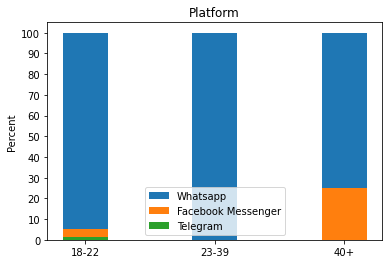

In [10]:
N = 3
wa = (7500/75, 300/3, 100)
fb = (400/75, 0, 25)
t = (100/75, 0, 0)

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, wa, width)
p2 = plt.bar(ind, fb, width)
p3 = plt.bar(ind, t, width)

plt.ylabel('Percent')
plt.title('Platform')
plt.xticks(ind, ('18-22', '23-39', '40+'))
plt.yticks(np.arange(0, 101, 10))
plt.legend((p1[0], p2[0], p3[0]), ('Whatsapp', 'Facebook Messenger', 'Telegram'))

plt.show()